In [ ]:
import tensorflow as tf

In [ ]:
import keras

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar100

In [ ]:
from keras.utils import to_categorical

In [ ]:
(train_X, train_Y_),(test_X, test_Y_) = cifar100.load_data()

169009152/169001437 [==============================] - 11s 0us/step


In [ ]:
train_Y = to_categorical(train_Y_)
test_Y = to_categorical(test_Y_)

In [ ]:
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/ 255

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import  Conv2D, Dense, BatchNormalization, Flatten, MaxPool2D, Input

In [ ]:
def create_VGG16_Network():
  model = Sequential()
  model.add(Input(shape = (32,32,3)))
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 32, kernel_size=(3,3),activation='relu', padding= 'same', bias_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 64, kernel_size= (3,3),  activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size= (3,3),  activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(units = 256, activation = 'relu', bias_regularizer='l2'))
  model.add(Dense(units = 256,activation='relu', bias_regularizer='l2'))
  model.add(Dense(units = 100, activation = 'softmax', bias_regularizer='l2'))
  return model

In [ ]:
model  = create_VGG16_Network()

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = F'/content/gdrive/My Drive/Weights/VGG16_SGD_BatchNormalization.h5'

In [ ]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', verbose = 1, min_delta = 0.001, patience= 20)
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=path, monitor = 'val_accuracy',save_best_only=True, save_weights_only=True, mode = 'max')
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [ ]:
history = model.fit(x = train_X, y = train_Y, batch_size= 32, epochs = 200, validation_split= 0.1, callbacks=[earlyStopping, model_checkpoint])

Epoch 1/200
1407/1407 [==============================] - 10s 7ms/step - loss: 4.1681 - accuracy: 0.0688 - val_loss: 5.0729 - val_accuracy: 0.0406
Epoch 2/200
1407/1407 [==============================] - 10s 7ms/step - loss: 3.6161 - accuracy: 0.1446 - val_loss: 3.7428 - val_accuracy: 0.1184
Epoch 3/200
1407/1407 [==============================] - 9s 6ms/step - loss: 3.3047 - accuracy: 0.1973 - val_loss: 3.9333 - val_accuracy: 0.1124
Epoch 4/200
1407/1407 [==============================] - 10s 7ms/step - loss: 3.0768 - accuracy: 0.2381 - val_loss: 3.3623 - val_accuracy: 0.1916
Epoch 5/200
1407/1407 [==============================] - 9s 7ms/step - loss: 2.8966 - accuracy: 0.2705 - val_loss: 3.1721 - val_accuracy: 0.2200
Epoch 6/200
1407/1407 [==============================] - 9s 6ms/step - loss: 2.7333 - accuracy: 0.3008 - val_loss: 3.3176 - val_accuracy: 0.2134
Epoch 7/200
1407/1407 [==============================] - 10s 7ms/step - loss: 2.5813 - accuracy: 0.3354 - val_loss: 3.2517 - va

In [ ]:
model.load_weights('/content/gdrive/My Drive/Weights/VGG16_SGD_BatchNormalization.h5')

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
y_true = test_Y.argmax(-1)

In [ ]:
y_pred = y_pred.argmax(-1)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [ ]:
import pandas as pd

In [ ]:
def get_all_metrics(y_pred, y_true):
  precision = precision_score(y_true,y_pred, average = 'weighted')
  recall = recall_score(y_true , y_pred, average= 'weighted')
  accuracy = accuracy_score(y_true, y_pred)
  return precision, recall, accuracy

In [ ]:
prec, recall, accuracy = get_all_metrics(y_pred, y_true)

In [ ]:
print('Precision:', prec)

Precision: 0.37746178848284956


In [ ]:
print('Recall:', recall)

Recall: 0.3696


In [ ]:
print('Accuracy', accuracy)

Accuracy 0.3696


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
pd.crosstab(y_pred, y_true, colnames = ['y_predicted'], rownames = ['y_true'])

y_predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
y_true,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,78,1,1,0,0,0,0,0,0,0,11,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,3,0,4,0,1,0,10,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,1,0,0,0,3,0,0,0,0,0,16,0,0,0,1,0,0,0,0,3,0,2,0,0,0,0,0
1,2,40,0,0,0,0,0,0,1,0,1,0,0,0,4,1,0,0,3,0,1,0,0,0,0,1,1,0,0,0,0,0,3,0,2,0,2,1,0,0,0,0,1,0,0,0,0,2,0,0,2,1,0,3,2,0,0,1,0,0,0,0,4,0,1,1,0,0,1,0,3,0,0,0,0,0,0,3,0,0,1,0,0,3,0,0,1,1,0,0,0,2,5,3,0,0,0,0,0,0
2,0,1,23,0,0,4,0,0,0,0,0,11,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,11,4,0,1,0,0,1,1,1,1,1,6,0,0,0,3,0,0,0,1,0,0,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,2,0,1,1,0,0,0,0,0,0,1,0,0,1,4,1
3,0,0,0,18,2,0,1,0,0,0,0,2,0,1,1,7,1,0,0,2,0,7,0,0,1,1,1,0,1,0,1,5,3,1,2,0,2,0,2,1,0,0,0,3,0,0,1,1,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,6,1,1,1,1,0,0,0,0,4,0,1,0,1,0,0,0,3,0,2,0,0,1,1,0,1,0,2,0,1,2,0,2,1,0,1,0
4,0,0,2,4,25,1,0,2,0,0,2,0,0,1,1,4,0,0,0,1,0,0,0,0,0,2,1,2,0,0,0,3,1,0,2,0,2,1,3,0,0,1,2,4,0,2,1,0,0,0,4,1,0,0,0,7,0,0,1,0,0,0,0,7,2,1,2,3,1,0,0,1,7,1,10,0,0,0,2,1,4,1,0,0,1,1,1,1,2,0,1,2,1,1,0,0,1,1,0,1
5,0,0,0,0,0,26,0,0,0,1,2,0,3,0,0,0,1,0,0,0,4,0,1,0,0,7,1,1,0,0,0,0,1,0,0,1,3,2,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,6,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0
6,1,2,0,1,0,0,37,0,0,0,0,0,0,1,5,0,0,0,2,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,3,0,0,0,0,1,0,2,0,0,0,0,2,0,0,2,0,0,1,2,0,0,0,0,0,1,2,1,0,0,0,0,1,0,0,0,1,1,0,0,0,5,0,0,5,1,1,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0
7,0,0,0,0,1,0,2,41,2,0,0,0,0,0,2,0,0,0,1,2,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,2,3,0,4,1,2,1,0,0,3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,0,1,0,0,1,0,0,1,42,2,0,0,3,2,0,1,3,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,3,1,1,1,0,0,0,1,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


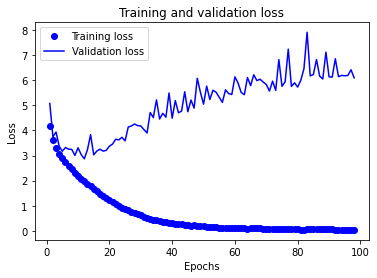

In [ ]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
history_dict = history.history
print(history_dict.keys())
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs,val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored